In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load dataset
df = pd.read_csv('Casino_Gaming_Data new.csv')

# Create a backup of the original file
df.to_csv("casino_data_backup.csv", index=False)

In [3]:
# Show the details of the attributes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Fiscal Year                                 143 non-null    object
 1   Month Ending                                143 non-null    object
 2   Licensee                                    143 non-null    object
 3   Wagers                                      143 non-null    int64 
 4   Patron Winnings                             143 non-null    int64 
 5   Cancelled Wagers                            143 non-null    int64 
 6   Online Casino Gaming Win/(Loss)             143 non-null    int64 
 7   Promotional Coupons or Credits Wagered (3)  143 non-null    int64 
 8   Promotional Deduction (4)                   143 non-null    int64 
 9   Total Gross Gaming Revenue                  143 non-null    int64 
 10  Payment (5)               

In [4]:
# Compare statistics before and after transformation
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
             Wagers  Patron Winnings  Cancelled Wagers  \
count  1.430000e+02     1.430000e+02      1.430000e+02   
mean   2.742207e+08     2.655218e+08      1.783408e+05   
std    2.815530e+08     2.725166e+08      2.826004e+05   
min    1.145280e+05     1.113650e+05      0.000000e+00   
25%    1.407190e+06     1.357855e+06      5.000000e+00   
50%    2.656540e+08     2.575127e+08      3.887000e+03   
75%    5.352846e+08     5.156584e+08      2.913700e+05   
max    7.838842e+08     7.573176e+08      1.133136e+06   

       Online Casino Gaming Win/(Loss)  \
count                     1.430000e+02   
mean                      8.520509e+06   
std                       8.921912e+06   
min                      -8.099000e+04   
25%                       3.713950e+04   
50%                       7.866081e+06   
75%                       1.587461e+07   
max                       2.570443e+07   

       Promotional Coupons or Credits Wagered (3)  Promotional Deduction (

In [5]:
# Define engagement metrics
engagement_metrics = [
    "Wagers",
    "Patron Winnings",
    "Cancelled Wagers",
    "Promotional Coupons or Credits Wagered (3)",
    "Total Gross Gaming Revenue",
    "Online Casino Gaming Win/(Loss)"
]

# Compute mean values of the metrics
mean = df[engagement_metrics].mean()

# Create a comparison table
mean_table = pd.DataFrame({
    "Metric": engagement_metrics,
    "Mean": mean.values})

# Display table
mean_table

,Metric,Mean
0,Wagers,2.742207e+08
1,Patron Winnings,2.655218e+08
2,Cancelled Wagers,1.783408e+05
3,Promotional Coupons or Credits Wagered (3),2.909760e+06
4,Total Gross Gaming Revenue,7.050150e+06
5,Online Casino Gaming Win/(Loss),8.520509e+06


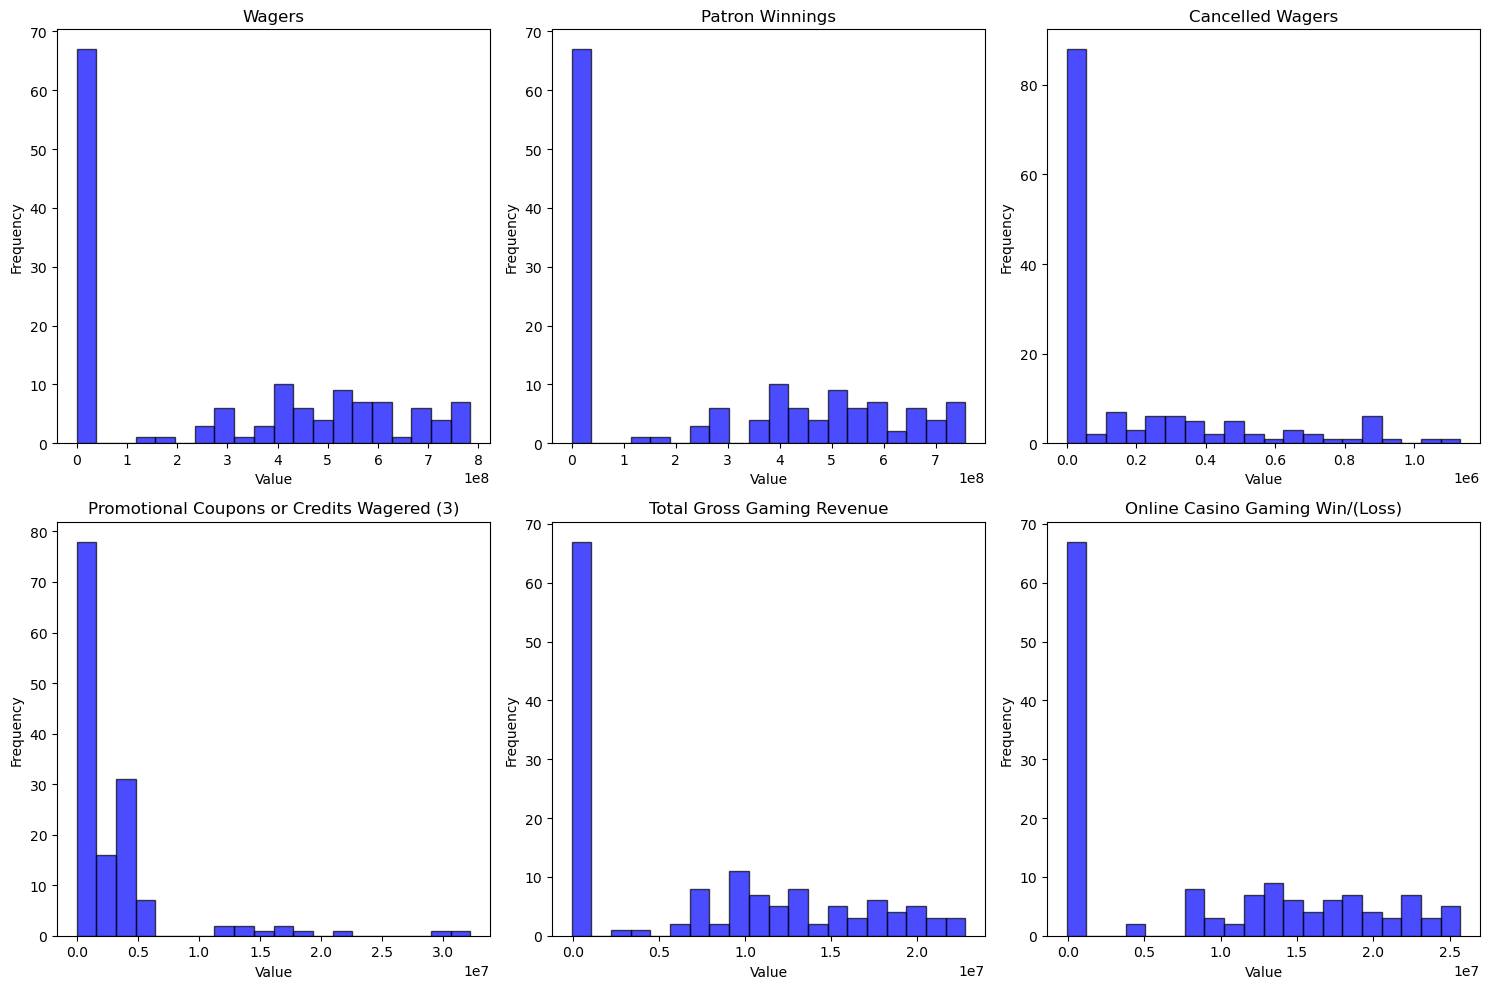

In [6]:
# Plot histograms for engagement metrics
plt.figure(figsize=(15, 10))
for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[metric].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(metric)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Data Preprocessing

#### Since the dataset contains numeric columns with large ranges and negative values, normalization will be performed

In [7]:
# Select only numerical columns (ignoring categorical ones like 'Fiscal Year' and 'Licensee')
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
df[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

df.to_csv("Casino_Gaming_Data new.csv", index=False)
print(df[numeric_cols].describe())

           Wagers  Patron Winnings  Cancelled Wagers  \
count  143.000000       143.000000        143.000000   
mean     0.349728         0.350513          0.157387   
std      0.359229         0.359897          0.249397   
min      0.000000         0.000000          0.000000   
25%      0.001649         0.001646          0.000004   
50%      0.338798         0.339936          0.003430   
75%      0.682815         0.680854          0.257136   
max      1.000000         1.000000          1.000000   

       Online Casino Gaming Win/(Loss)  \
count                       143.000000   
mean                          0.333580   
std                           0.346006   
min                           0.000000   
25%                           0.004581   
50%                           0.308200   
75%                           0.618784   
max                           1.000000   

       Promotional Coupons or Credits Wagered (3)  Promotional Deduction (4)  \
count                               

In [8]:
# Convert 'Month Ending' to Year and Month for better readability
df['Month Ending'] = pd.to_datetime(df['Month Ending'], format="%m/%d/%Y %I:%M:%S %p")

# Extract Year and Month for analysis
df['Year'] = df['Month Ending'].dt.year
df['Month'] = df['Month Ending'].dt.month

# Display some to check
print(df.head())

  Fiscal Year Month Ending                             Licensee    Wagers  \
0     2021/22   2022-06-30         Mohegan Tribe On-Reservation  0.000337   
1     2021/22   2022-06-30                  MPTN On-Reservation  0.000711   
2     2021/22   2022-06-30  MPI Master Wagering License CT, LLC  0.535797   
3     2021/22   2022-06-30                 Mohegan Digital, LLC  0.324431   
4     2021/22   2022-05-31         Mohegan Tribe On-Reservation  0.000768   

   Patron Winnings  Cancelled Wagers  Online Casino Gaming Win/(Loss)  \
0         0.000296          0.000004                         0.004828   
1         0.000759          0.000003                         0.002596   
2         0.537111          0.145373                         0.510274   
3         0.325413          0.010277                         0.308200   
4         0.000753          0.000000                         0.004510   

   Promotional Coupons or Credits Wagered (3)  Promotional Deduction (4)  \
0                     

In [9]:
# Check for missing value
print(df.isnull().sum())

Fiscal Year                                   0
Month Ending                                  0
Licensee                                      0
Wagers                                        0
Patron Winnings                               0
Cancelled Wagers                              0
Online Casino Gaming Win/(Loss)               0
Promotional Coupons or Credits Wagered (3)    0
Promotional Deduction (4)                     0
Total Gross Gaming Revenue                    0
Payment (5)                                   0
Year                                          0
Month                                         0
dtype: int64


#### There is no missing value for all the columns, can proceed to the next step.

In [10]:
# Check if there is duplicated item
print(df.duplicated().sum())

0


#### No duplicated instance too. Finally, let's check for outliers...

Outlier Count:
Wagers                                         0
Patron Winnings                                0
Cancelled Wagers                              12
Online Casino Gaming Win/(Loss)                0
Promotional Coupons or Credits Wagered (3)    11
Promotional Deduction (4)                      0
Total Gross Gaming Revenue                     0
Payment (5)                                    0
dtype: int64


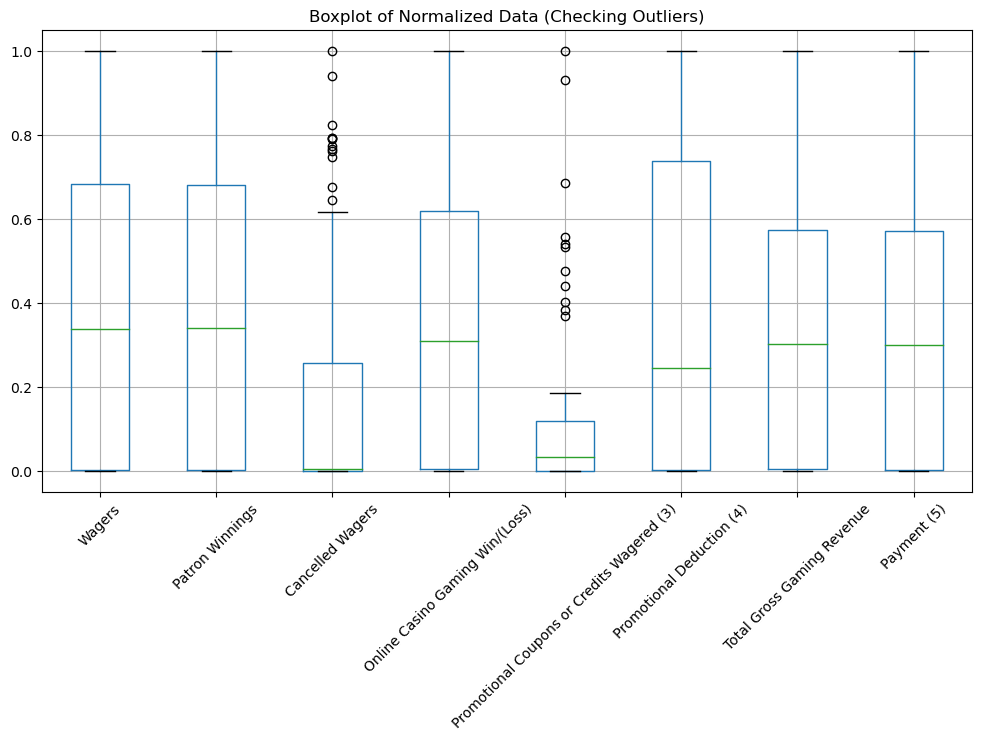

In [11]:
# Calculate IQR for each column to detect outliers
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR range
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outlier_counts = outliers.sum()
print("Outlier Count:")
print(outlier_counts)

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot of Normalized Data (Checking Outliers)")
plt.show()

#### Seems to have some extreme values for Cancelled Wagers and Promotional Coupons but considered that wagers can have a wide range, it's valid to include those outliers in the analysis as they can represent realistic variations or extreme but possible cases. Other columns all look good. Data are clean for EDA.

#  Exploratory Data Analysis (EDA)

## Revenue Trends Over Time

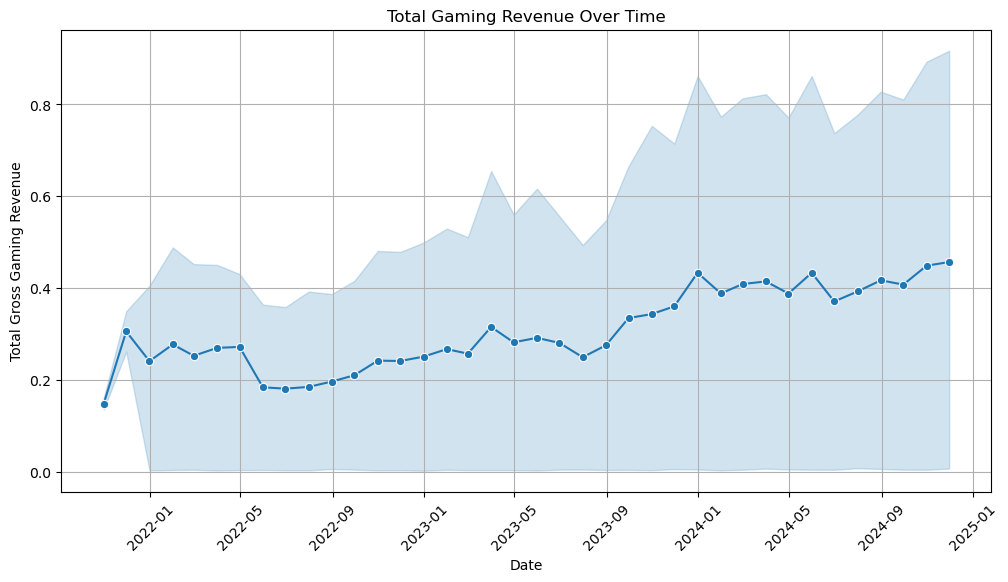

In [12]:
# Plot revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month Ending', y='Total Gross Gaming Revenue', data=df, marker='o')

# Formatting
plt.title('Total Gaming Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Gross Gaming Revenue')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

### The data suggests a positive growth trend in gaming revenue over time

## Revenue Seasonal Trends

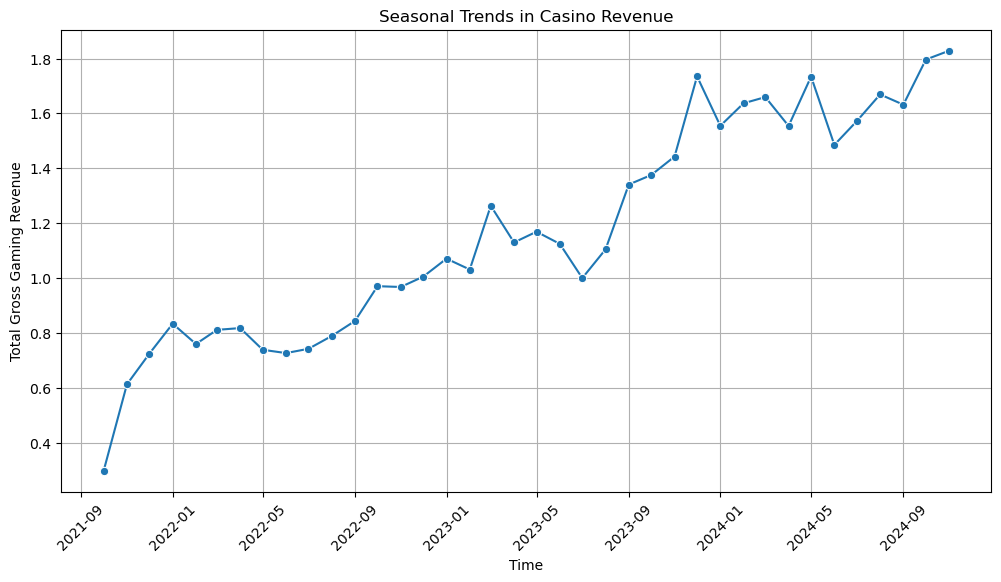

In [13]:
# Group by year and month to calculate total revenue
monthly_trend = df.groupby(['Year', 'Month'])['Total Gross Gaming Revenue'].sum().reset_index()

# Create a time-based index for proper plotting
monthly_trend['time'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(day=1))

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Total Gross Gaming Revenue', data=monthly_trend, marker='o')

# Formatting
plt.title('Seasonal Trends in Casino Revenue')
plt.xlabel('Time')
plt.ylabel('Total Gross Gaming Revenue')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

## Performance of Casino License

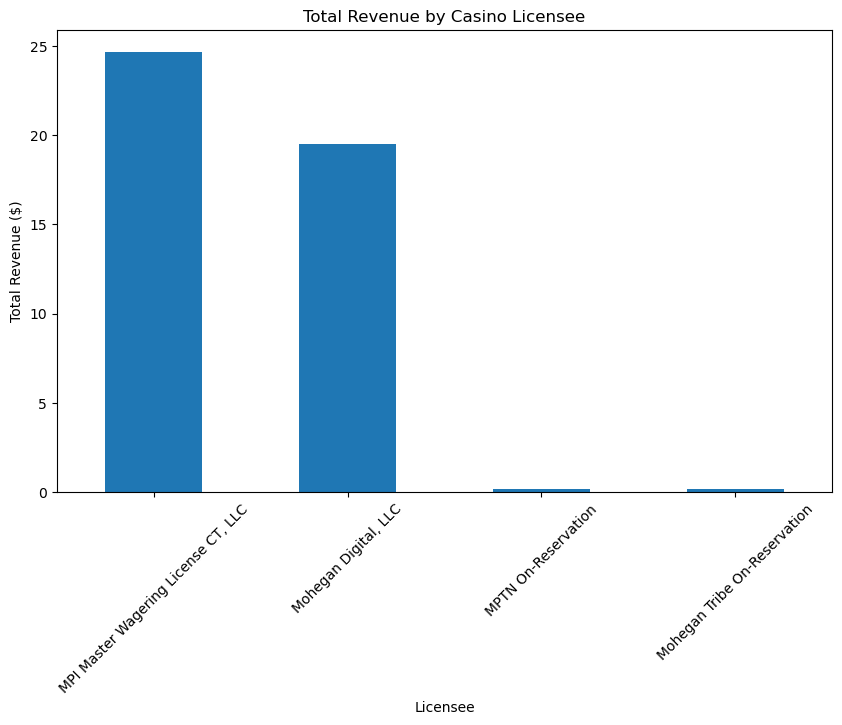

In [14]:
# Group by Licensee and sum revenue
df_licensee = df.groupby("Licensee")["Total Gross Gaming Revenue"].sum()

# Plot
df_licensee.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Total Revenue by Casino Licensee")
plt.xlabel("Licensee")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Compute percentile threshold (e.g., bottom 25%)
threshold = df["Total Gross Gaming Revenue"].quantile(0.25)

# Count months where each casino is in the bottom 25%
underperforming_counts = df[df["Total Gross Gaming Revenue"] <= threshold].groupby("Licensee").size()

# Display casinos with most occurrences in the bottom 25%
print("Casinos consistently underperforming", underperforming_counts.sort_values(ascending=False).head(5))

Casinos consistently underperforming Licensee
MPTN On-Reservation             20
Mohegan Tribe On-Reservation    16
dtype: int64


#### Casinos with revenue remains in the lowest percentile across multiple months indicate consistent underperformance.

## Correlation Between Metrics

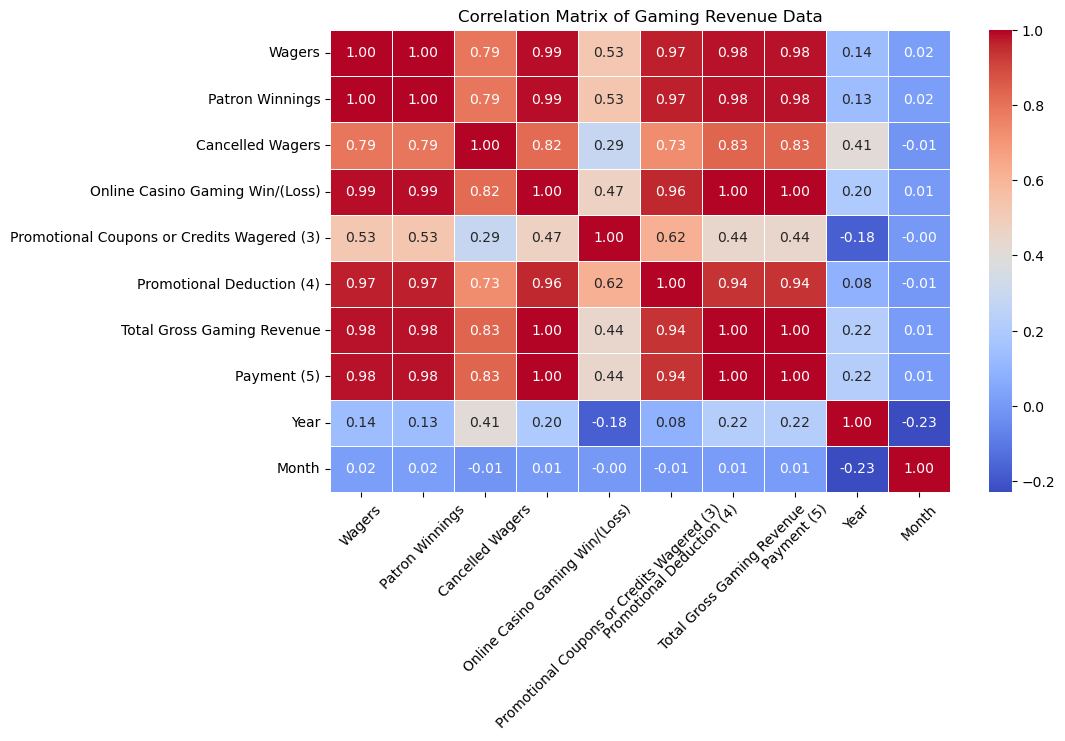

In [16]:
# Select only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Formatting
plt.title('Correlation Matrix of Gaming Revenue Data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


Hypothesis Test: Correlation between Promotional Coupons or Credits Wagered and Total Gross Gaming Revenue
Shapiro-Wilk Test for Promotional Coupons or Credits Wagered: p-value = 0.0000
Shapiro-Wilk Test for Revenue: p-value = 0.0000


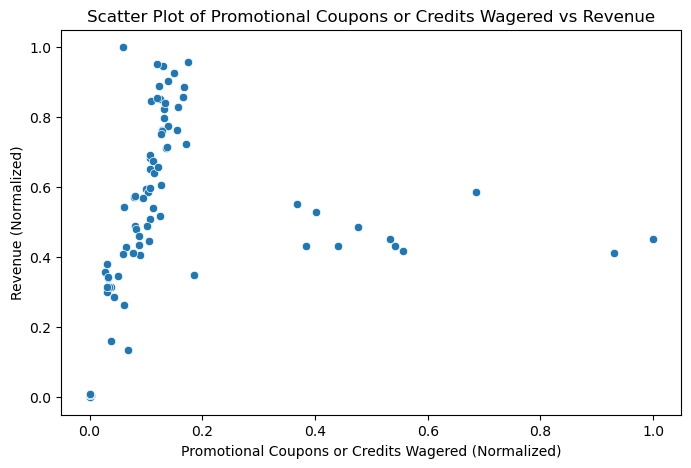

Pearson's correlation coefficient: 0.4408
P-value: 0.0000
Reject the null hypothesis: There is a significant relationship between Promotional Coupons or Credits Wagered and total gross gaming revenue.

Hypothesis Test: Correlation between Cancelled Wagers and Total Gross Gaming Revenue
Shapiro-Wilk Test for Cancelled Wagers: p-value = 0.0000
Shapiro-Wilk Test for Revenue: p-value = 0.0000


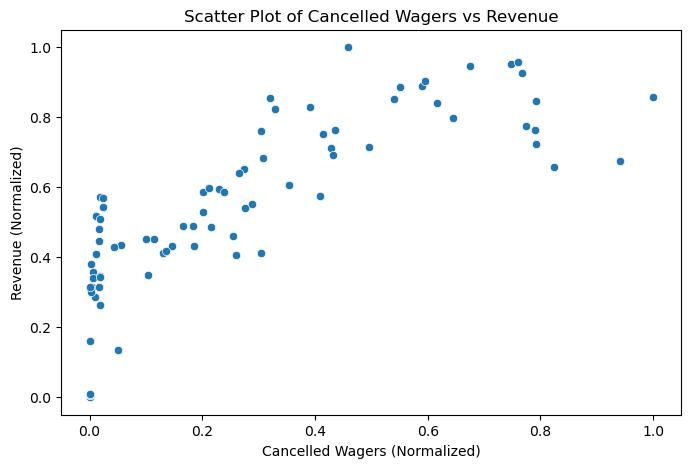

Pearson's correlation coefficient: 0.8327
P-value: 0.0000
Reject the null hypothesis: There is a significant relationship between Cancelled Wagers and total gross gaming revenue.


In [17]:
# Define column names exactly as they appear in the dataset
promotion_col = "Promotional Coupons or Credits Wagered (3)"
cancelled_wagers_col = "Cancelled Wagers"
revenue_col = "Total Gross Gaming Revenue"

# Function to perform correlation test
def correlation_test(x_col, y_col, x_label):
    print(f"\nHypothesis Test: Correlation between {x_label} and Total Gross Gaming Revenue")

    # Check normality using Shapiro-Wilk test
    shapiro_x = stats.shapiro(df[x_col])
    shapiro_y = stats.shapiro(df[y_col])
    print(f"Shapiro-Wilk Test for {x_label}: p-value = {shapiro_x.pvalue:.4f}")
    print(f"Shapiro-Wilk Test for Revenue: p-value = {shapiro_y.pvalue:.4f}")

    # Scatter plot to visualize the relationship
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[x_col], y=df[y_col])
    plt.title(f"Scatter Plot of {x_label} vs Revenue")
    plt.xlabel(f"{x_label} (Normalized)")
    plt.ylabel("Revenue (Normalized)")
    plt.show()

    # Perform Pearson's correlation test
    corr_coef, p_value = stats.pearsonr(df[x_col], df[y_col])

    # Print results
    print(f"Pearson's correlation coefficient: {corr_coef:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant relationship between {x_label} and total gross gaming revenue.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant relationship between {x_label} and total gross gaming revenue.")

# Run tests for both Promotion and Cancelled Wagers
correlation_test(promotion_col, revenue_col, "Promotional Coupons or Credits Wagered")
correlation_test(cancelled_wagers_col, revenue_col, "Cancelled Wagers")


Shapiro-Wilk Test for Promotional Spending: p-value = 0.0000
Shapiro-Wilk Test for Net Winnings: p-value = 0.0000


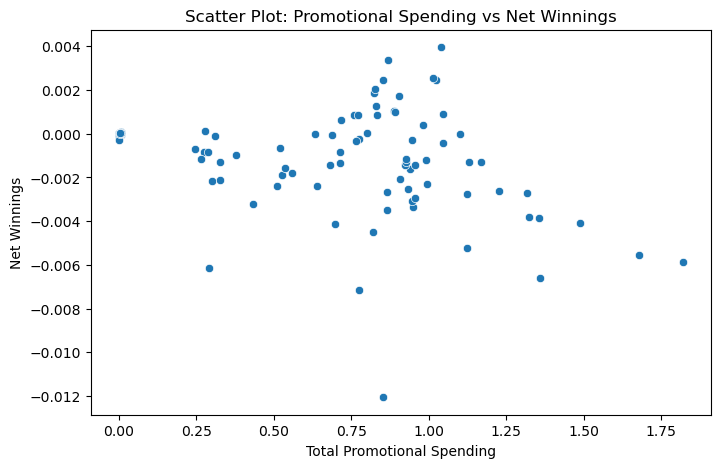

Pearson's correlation coefficient: -0.4016
P-value: 0.0000
Reject the null hypothesis: Promotional spending has a significant relationship with net winnings.


In [18]:
# Define column names
promotion_col1 = "Promotional Coupons or Credits Wagered (3)"
promotion_col2 = "Promotional Deduction (4)"
wagers_col = "Wagers"
winnings_col = "Patron Winnings"

# Calculate Total Promotional Spending and Net Winnings
df["Total Promotional Spending"] = df[promotion_col1] + df[promotion_col2]
df["Net Winnings"] = df[wagers_col] - df[winnings_col]

# Shapiro-Wilk normality test
shapiro_promo = stats.shapiro(df["Total Promotional Spending"])
shapiro_netwin = stats.shapiro(df["Net Winnings"])
print(f"Shapiro-Wilk Test for Promotional Spending: p-value = {shapiro_promo.pvalue:.4f}")
print(f"Shapiro-Wilk Test for Net Winnings: p-value = {shapiro_netwin.pvalue:.4f}")

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Total Promotional Spending"], y=df["Net Winnings"])
plt.title("Scatter Plot: Promotional Spending vs Net Winnings")
plt.xlabel("Total Promotional Spending")
plt.ylabel("Net Winnings")
plt.show()

# Pearson correlation test
corr_coef, p_value = stats.pearsonr(df["Total Promotional Spending"], df["Net Winnings"])

# Print results
print(f"Pearson's correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Promotional spending has a significant relationship with net winnings.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between promotional spending and net winnings.")

count    142.000000
mean     100.395009
std        2.264957
min       87.715465
25%       99.794681
50%      100.255237
75%      100.909481
max      108.074327
Name: Return_Percentage, dtype: float64


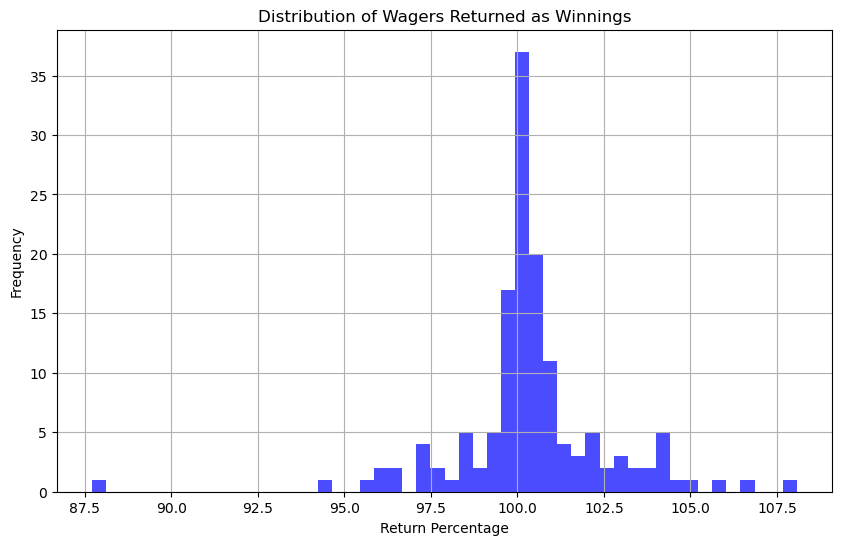

In [19]:
# Calculate the percentage of wagers returned as winnings
df['Return_Percentage'] = (df['Patron Winnings'] / df['Wagers']) * 100

# Display summary statistics
print(df['Return_Percentage'].describe())

# Plot the distribution of return percentages
plt.figure(figsize=(10, 6))
plt.hist(df['Return_Percentage'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Wagers Returned as Winnings')
plt.xlabel('Return Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()